# Step 2: Preparing data for training

Objectives

- 3.1. Importing daily scores from news folder
- 3.2. Importing daily stock data from stock folder
- 3.3. Merge both the imported data with date
- 3.4. Saving the merged data
- 3.5. Check data by plotting the graph


In [1]:
import pandas as pd
import json

import matplotlib.pyplot as plt

### 3.1. Importing daily scores from news folder


In [2]:
with open('reliancedaily_scores.json', 'r') as file:
    sentimentScores = json.load(file)
#endwith

dfSentiment = pd.DataFrame(list(sentimentScores.items()), columns=['jsonDate', 'sentiment'])
dfSentiment['date'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')

dfSentiment['date'] = dfSentiment['date'].dt.strftime('%Y-%m-%d')
dfSentiment['jsonDate'] = pd.to_datetime(dfSentiment['jsonDate'], format='%d %b %Y')
dfSentiment['jsonDate'] = dfSentiment['jsonDate'].dt.strftime('%Y-%m-%d')


dfSentiment.head()

,jsonDate,sentiment,date
0,2011-01-03,"[0.06955227255821228, 0.10576020181179047, 0.2...",2011-01-03
1,2011-01-05,"[0.05843456834554672, 0.08646899461746216, 0.2...",2011-01-05
2,2011-01-07,"[0.05296649783849716, 0.08330032229423523, 0.2...",2011-01-07
3,2011-01-10,"[0.07095428556203842, 0.09166199713945389, 0.2...",2011-01-10
4,2011-01-11,"[0.18488772213459015, 0.20468389987945557, 0.2...",2011-01-11


### 3.2. Importing daily stock data from stock folder

- Data used will be of Habib Bank Limited (HBL)
- This bank is considered to be the top performing and one of the most profitable bank in the country [[Source: AsiaMoney](https://www.asiamoney.com/article/2bp0xnj0tjyfvvwhd8oow/awards/best-bank-awards/pakistans-best-domestic-bank-2023-hbl)]
- This bank has branches outside Pakistan as well


In [4]:
#csvFilePath = 'M:\miniproject\relianceBANK_2013-01-01_to_2024_01-01.csv'
dfCsv = pd.read_csv("inputfiles/reliance_2013-01-01_to_2024_01-01.csv")
dfCsv.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,385.848419,387.037048,383.608276,384.339752,354.642761,3415675
1,2013-01-02,385.848419,391.334412,385.185516,387.654205,357.701111,6720949
2,2013-01-03,387.951385,394.077393,386.122711,393.505951,363.100739,8633404
3,2013-01-04,394.031677,395.266022,390.214355,394.008820,363.564697,6653188
4,2013-01-07,395.768921,398.191895,389.414307,391.608704,361.350067,7653590


### 3.3. Merge both the imported data with date


In [5]:
'''dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])#puting 0,0,0,0,0 if sentiment is not present
#dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: [0, 0, 0, 0, 0] if pd.isnan(x) else x)
#print(dfMerged['sentiment'].head(20))
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)
#dfMerged.to_csv('merged_data.csv', index=False)
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])
dfMerged.head(10)'''
# Convert 'Date' column in dfCsv to datetime
dfCsv['date'] = pd.to_datetime(dfCsv['Date'], format='%Y-%m-%d')

# Convert 'date' column in dfSentiment to datetime
dfSentiment['date'] = pd.to_datetime(dfSentiment['date'], format='%Y-%m-%d')

# Merge dfCsv and dfSentiment on 'date'
dfMerged = pd.merge(dfCsv, dfSentiment, on='date', how='left')

# Replace non-list values in 'sentiment' with [0, 0, 0, 0, 0]
dfMerged['sentiment'] = dfMerged['sentiment'].apply(lambda x: x if isinstance(x, list) else [0, 0, 0, 0, 0])

# Split 'sentiment' list into separate columns
dfSentimentColumns = pd.DataFrame(dfMerged['sentiment'].tolist(), columns=['feature1', 'feature2', 'feature3', 'feature4', 'feature5'])

# Concatenate dfMerged and dfSentimentColumns
dfMerged = pd.concat([dfMerged, dfSentimentColumns], axis=1)

# Drop unnecessary columns
dfMerged = dfMerged.drop(columns=['date', 'sentiment', 'jsonDate'])

dfMerged.to_csv('reliance_merged.csv', index=False)
# Display the first 10 rows of dfMerged
dfMerged.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,feature1,feature2,feature3,feature4,feature5
0,2013-01-01,385.848419,387.037048,383.608276,384.339752,354.642761,3415675,0.000000,0.000000,0.000000,0.000000,0.000000
1,2013-01-02,385.848419,391.334412,385.185516,387.654205,357.701111,6720949,0.085759,0.077786,0.163777,0.284849,0.387830
2,2013-01-03,387.951385,394.077393,386.122711,393.505951,363.100739,8633404,0.090865,0.112908,0.233915,0.306485,0.255826
3,2013-01-04,394.031677,395.266022,390.214355,394.008820,363.564697,6653188,0.184743,0.164837,0.226831,0.241007,0.182582
4,2013-01-07,395.768921,398.191895,389.414307,391.608704,361.350067,7653590,0.108138,0.115598,0.219081,0.280917,0.276266
5,2013-01-08,390.922943,392.294464,387.631348,388.888550,358.840057,6986898,0.058149,0.099746,0.251512,0.326187,0.264405
6,2013-01-09,389.688599,393.094482,387.974243,389.825745,359.704865,8535912,0.158756,0.163884,0.268614,0.247711,0.161036
7,2013-01-10,392.134430,392.683044,387.219910,388.614258,358.587006,4619906,0.155007,0.132174,0.197944,0.249394,0.265481
8,2013-01-11,389.734314,389.962891,382.305359,383.974030,354.305267,4025147,0.197740,0.182736,0.235140,0.208153,0.176231
9,2013-01-14,384.476898,389.962891,383.562561,387.471344,357.532410,3530443,0.158818,0.216375,0.248596,0.192230,0.183981


### 3.4. Saving the merged data

- Saving the file in CSV format ((reliance_merged.csv))


In [6]:
outputCsvPath = 'reliance_merged.csv'
dfMerged.to_csv(outputCsvPath, index=False)

### 3.5. Check data by plotting the graph


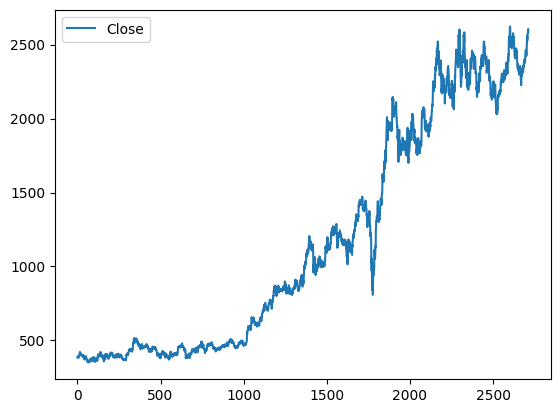

In [7]:
dfMerged[['Close']].plot()
plt.show()